<a href="https://colab.research.google.com/github/aifa21/Aifa/blob/main/pretrainedModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
dataset_path= "drive/My Drive/chest_xray/train"

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

image_paths = []
categories = []

categories_list = ["NORMAL", "PNEUMONIA"]

for category in categories_list:
    category_path = os.path.join(dataset_path, category)

    if os.path.exists(category_path):

        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            image_paths.append(image_path)
            categories.append(category)

df = pd.DataFrame({'image_path': image_paths, 'category': categories})

In [ ]:
df.shape

(5216, 2)

In [ ]:
df.columns

Index(['image_path', 'category'], dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['category'].unique()

array(['NORMAL', 'PNEUMONIA'], dtype=object)

In [ ]:
df['category'].value_counts()

,count
category,
PNEUMONIA,3875
NORMAL,1341


<ipython-input-11-63c71ecf1027>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


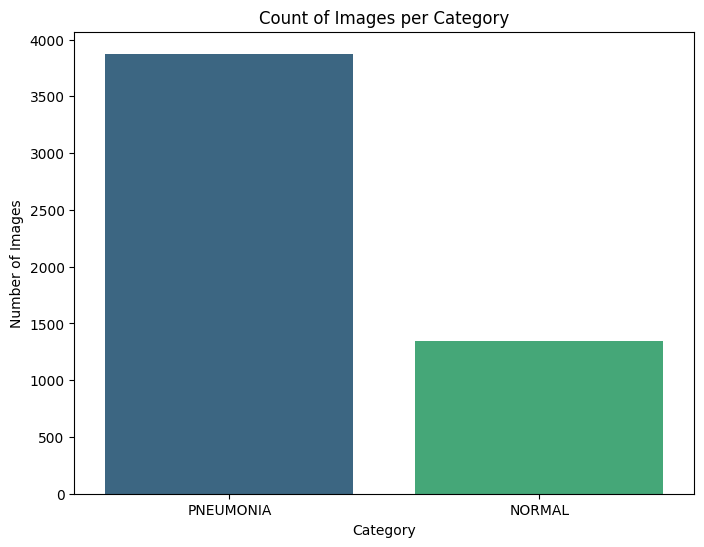

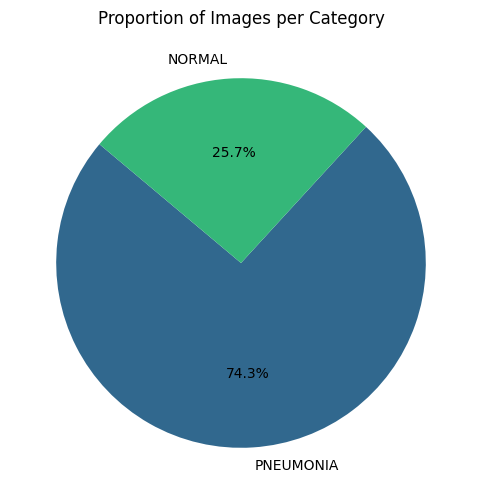

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

category_counts = df['category'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Count of Images per Category")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(category_counts)))
plt.title("Proportion of Images per Category")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['category'])

In [ ]:
df

,image_path,category,category_encoded
0,drive/My Drive/chest_xray/train/NORMAL/IM-0514...,NORMAL,0
1,drive/My Drive/chest_xray/train/NORMAL/IM-0520...,NORMAL,0
2,drive/My Drive/chest_xray/train/NORMAL/IM-0519...,NORMAL,0
3,drive/My Drive/chest_xray/train/NORMAL/IM-0523...,NORMAL,0
4,drive/My Drive/chest_xray/train/NORMAL/IM-0509...,NORMAL,0
...,...,...,...
5211,drive/My Drive/chest_xray/train/PNEUMONIA/pers...,PNEUMONIA,1
5212,drive/My Drive/chest_xray/train/PNEUMONIA/pers...,PNEUMONIA,1
5213,drive/My Drive/chest_xray/train/PNEUMONIA/pers...,PNEUMONIA,1
5214,drive/My Drive/chest_xray/train/PNEUMONIA/pers...,PNEUMONIA,1


In [ ]:
df = df[['image_path', 'category_encoded']]

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [ ]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled


In [ ]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    3875
1    3875
Name: count, dtype: int64


In [ ]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [ ]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [ ]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 6200 validated image filenames belonging to 2 classes.
Found 775 validated image filenames belonging to 2 classes.
Found 775 validated image filenames belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
# define image size
img_size = 224

# load the pre-trained model (ResNet50)
base_model = VGG16(input_shape=(img_size,img_size,3), include_top=False,weights='imagenet')

# freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# add custom layers for classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# create a new model
model = Model(inputs=base_model.input, outputs=predictions)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
history = model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
388/388 [==============================] - 4849s 12s/step - loss: 0.1262 - accuracy: 0.9510 - val_loss: 0.0499 - val_accuracy: 0.9806
Epoch 2/5
388/388 [==============================] - 4694s 12s/step - loss: 0.0398 - accuracy: 0.9866 - val_loss: 0.0360 - val_accuracy: 0.9897
Epoch 3/5
388/388 [==============================] - 4758s 12s/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0271 - val_accuracy: 0.9923
Epoch 4/5
388/388 [==============================] - 4616s 12s/step - loss: 0.0309 - accuracy: 0.9884 - val_loss: 0.2253 - val_accuracy: 0.9226
Epoch 5/5
257/388 [==================>...........] - ETA: 22:53 - loss: 0.0206 - accuracy: 0.9925

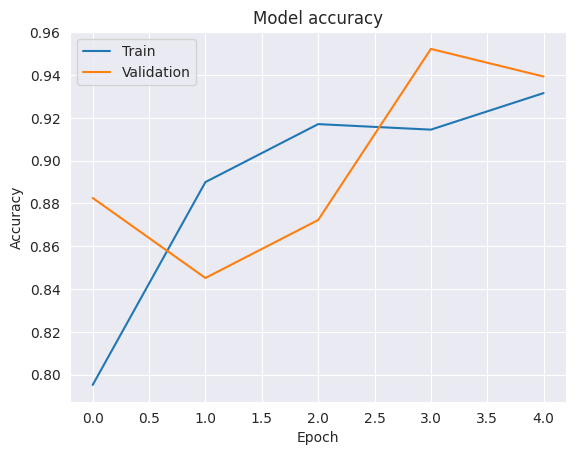

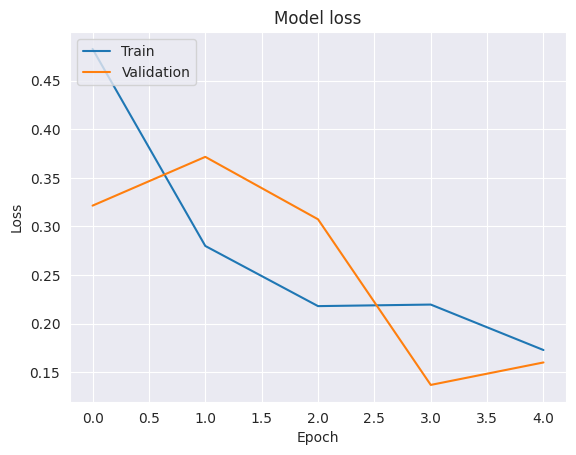

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_gen_new.classes
predictions = model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

49/49 [==============================] - 207s 4s/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       388
           1       0.00      0.00      0.00       387

    accuracy                           0.50       775
   macro avg       0.25      0.50      0.33       775
weighted avg       0.25      0.50      0.33       775



In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

In [ ]:
# define training config
TRAIN_STEPS = 5177
VAL_STEPS = 1722
epochs = 10
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.optimizers import SGD
# Import the VGG16 pretrained model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# initialize the model
vgg16 = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
img_size=224
# Freeze all but the last 3 layers
for layer in vgg16.layers[:-3]:
  layer.trainable = False

# build model
input = vgg16.layers[-1].output # input is the last output from vgg16

x = Dropout(0.25)(input)
x = Flatten()(x)
output = Dense(2, activation='softmax')(x)

# create the model
vgg16_model = Model(vgg16.input, output, name='VGG16_Model')

# compile the model
vgg16_model.compile(optimizer= SGD(learning_rate=1e-3), loss= 'categorical_crossentropy', metrics= ['accuracy'])




# define the image generators for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# specify the training and validation data directories
train_dir = '/content/drive/MyDrive/chest_xray/train'
val_dir = '/content/drive/MyDrive/chest_xray/val'

# create the image generators for training and validation data
train_generator = train_datagen.flow_from_directory(train_dir,

          target_size=(img_size, img_size), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(img_size, img_size),
                                                batch_size=32, class_mode='categorical')

# train the model
# Train model
vgg16_model.fit(train_generator, epochs=10, validation_data=val_generator)
# evaluate the model on test data
test_dir = '/content/drive/MyDrive/chest_xray/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=32, class_mode='categorical', shuffle=False)
test_loss, test_acc = vgg16_model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 3979s 24s/step - accuracy: 0.7579 - loss: 0.5510 - val_accuracy: 0.6875 - val_loss: 0.6579
Epoch 2/10
 58/163 ━━━━━━━━━━━━━━━━━━━━ 41:36 24s/step - accuracy: 0.9058 - loss: 0.2143

In [ ]:
# saving the pre-trained model
model.save(r"/content/drive/MyDrive/chest_xray/model.h5")

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/chest_xray/model.h5")

NameError: name 'tf' is not defined

In [ ]:
# saving the pre-trained model
model2.save(r"/content/drive/MyDrive/chest_xray/model2.h5")

In [ ]:
model2 = tf.keras.models.load_model("/content/drive/MyDrive/chest_xray/model2.h5")

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_1 = load_model('/content/drive/MyDrive/chest_xray/model.h5')
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')
model_2 = load_model('/content/drive/MyDrive/chest_xray/model2.h5')
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2')
models = [model_1, model_2]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history=ensemble_model.fit(
  train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1384s 8s/step - accuracy: 0.8931 - loss: 0.4768 - val_accuracy: 0.5000 - val_loss: 0.5510
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1392s 8s/step - accuracy: 0.7484 - loss: 0.4312 - val_accuracy: 0.5000 - val_loss: 0.5667
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1372s 8s/step - accuracy: 0.7380 - loss: 0.4136 - val_accuracy: 0.5000 - val_loss: 0.6490
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1366s 8s/step - accuracy: 0.7423 - loss: 0.3969 - val_accuracy: 0.5000 - val_loss: 0.7357
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1397s 8s/step - accuracy: 0.7416 - loss: 0.3897 - val_accuracy: 0.5000 - val_loss: 0.7522
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1355s 8s/step - accuracy: 0.7304 - loss: 0.3811 - val_accuracy: 0.5000 - val_loss: 0.8114
Epoch 7/10
 82/163 ━━━━━━━━━━━━━━━━━━━━ 11:07 8s/step - accuracy: 0.7383 - loss: 0.3648

In [ ]:
model.summary()

In [ ]:
# evaluate the model on test data
test_dir = '/content/drive/MyDrive/chest_xray/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary', shuffle=False)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)